# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [63]:
billboard = pd.read_csv("../assets/billboard.csv")

In [64]:
print(billboard.columns)

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [65]:
print(billboard['year'].unique())
#looks like all data is from year 2000

[2000]


In [66]:
for i in range(76):
    try:
        print(str(i)+'th week',billboard['x'+str(i)+'th.week'].count())
    except:
        pass

('4th week', 300)
('5th week', 292)
('6th week', 280)
('7th week', 269)
('8th week', 260)
('9th week', 253)
('10th week', 244)
('11th week', 236)
('12th week', 222)
('13th week', 210)
('14th week', 204)
('15th week', 197)
('16th week', 182)
('17th week', 177)
('18th week', 166)
('19th week', 156)
('20th week', 146)
('24th week', 46)
('25th week', 38)
('26th week', 36)
('27th week', 29)
('28th week', 24)
('29th week', 20)
('30th week', 20)
('34th week', 10)
('35th week', 9)
('36th week', 9)
('37th week', 9)
('38th week', 8)
('39th week', 8)
('40th week', 7)
('44th week', 6)
('45th week', 5)
('46th week', 5)
('47th week', 5)
('48th week', 4)
('49th week', 4)
('50th week', 4)
('54th week', 2)
('55th week', 2)
('56th week', 2)
('57th week', 2)
('58th week', 2)
('59th week', 2)
('60th week', 2)
('64th week', 2)
('65th week', 1)
('66th week', 0)
('67th week', 0)
('68th week', 0)
('69th week', 0)
('70th week', 0)
('74th week', 0)
('75th week', 0)


In [67]:
print(billboard['artist.inverted'].value_counts().value_counts())


1    164
2     43
3     18
4      2
5      1
Name: artist.inverted, dtype: int64


In [68]:
billboard[list(billboard.columns[1:7])].describe()

,artist.inverted,track,time,genre,date.entered,date.peaked
count,317,317,317,317,317,317
unique,228,316,126,10,68,53
top,Jay-Z,Where I Wanna Be,3:50,Rock,2000-01-29,2000-12-02
freq,5,2,9,137,11,17


In [69]:
billboard['genre'].value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data shows songs that appeared on the Billboard top 100 at some point in the year 2000 and how their ranks changed over the next 76 weeks.


The longest a song lasted on the list was 65 weeks.

Most artists have only 1 song on the top 100, Jay-Z had 5!

Rock songs were the most frequent, followed by country and rap

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [70]:
billboard.rename(columns={'artist.inverted': 'artist'}, inplace=True) #rename artist column

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [71]:
week_column_list = list(billboard.columns[7:])
my_id_vars = list(billboard.columns[:7])

print(type(my_id_vars))


billboard[my_id_vars].count()

<type 'list'>


year            317
artist          317
track           317
time            317
genre           317
date.entered    317
date.peaked     317
dtype: int64

In [72]:
long_billboard = pd.melt(billboard,id_vars=my_id_vars,value_vars=week_column_list, value_name='rank',var_name='week')
long_billboard

,year,artist,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,x1st.week,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,x1st.week,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,x1st.week,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x1st.week,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x1st.week,81.0


In [74]:
#convert the date fields into datetime datatypes
long_billboard["date.entered"] = pd.to_datetime(long_billboard["date.entered"])
long_billboard["date.peaked"] = pd.to_datetime(long_billboard["date.peaked"])

#create new field that calculates difference between peak and entrance date
long_billboard["days_to_peak"] = long_billboard["date.peaked"]-long_billboard["date.entered"]

#This block creates a column for # days between date peaked and date entered:
long_billboard["days_to_peak_int"] = pd.to_timedelta(long_billboard["days_to_peak"], unit="d") #gives time difference in days
long_billboard["days_to_peak_int"] = long_billboard["days_to_peak_int"].astype(str) #converts time difference to string
long_billboard["days_to_peak_int"] = long_billboard["days_to_peak_int"].str[:2]  #strips off first two characters of time difference to get the #days to peak
long_billboard["days_to_peak_int"] = long_billboard["days_to_peak_int"].astype(int) #converts #days to peak to integer for calculations/plotting
long_billboard

,year,artist,track,time,genre,date.entered,date.peaked,week,rank,days_to_peak,days_to_peak_int
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0,56 days,56
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0,56 days,56
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0,98 days,98
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0,35 days,35
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0,70 days,70
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,x1st.week,59.0,70 days,70
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,x1st.week,83.0,84 days,84
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,x1st.week,63.0,84 days,84
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x1st.week,77.0,49 days,49
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x1st.week,81.0,273 days,27


In [81]:
#converts time column into seconds
seconds_list=[]
for i in billboard["time"]:
    seconds_list.append(int(i.split(":")[0])*60+int(i.split(':')[1]))
    
billboard["time in seconds"] = seconds_list
#convert the date fields into datetime datatypes
billboard["date.entered"] = pd.to_datetime(billboard["date.entered"])
billboard["date.peaked"] = pd.to_datetime(billboard["date.peaked"])

#create new field that calculates difference between peak and entrance date
billboard["days_to_peak"] = billboard["date.peaked"]-billboard["date.entered"]


#This block creates a column for # days between date peaked and date entered:
billboard["days_to_peak_int"] = pd.to_timedelta(billboard["days_to_peak"], unit="d") #gives time difference in days
billboard["days_to_peak_int"] = billboard["days_to_peak_int"].astype(str) #converts time difference to string
billboard["days_to_peak_int"] = billboard["days_to_peak_int"].str[:2]  #strips off first two characters of time difference to get the #days to peak
billboard["days_to_peak_int"] = billboard["days_to_peak_int"].astype(int) #converts #days to peak to integer for calculations/plotting

print(billboard)

     year               artist  \
0    2000      Destiny's Child   
1    2000              Santana   
2    2000        Savage Garden   
3    2000              Madonna   
4    2000  Aguilera, Christina   
5    2000                Janet   
6    2000      Destiny's Child   
7    2000    Iglesias, Enrique   
8    2000                Sisqo   
9    2000             Lonestar   
10   2000               N'Sync   
11   2000  Aguilera, Christina   
12   2000     Vertical Horizon   
13   2000                Creed   
14   2000              Aaliyah   
15   2000      matchbox twenty   
16   2000        Carey, Mariah   
17   2000          Hill, Faith   
18   2000                  Mya   
19   2000                Dream   
20   2000        Braxton, Toni   
21   2000        Anthony, Marc   
22   2000                  98�   
23   2000      Destiny's Child   
24   2000         3 Doors Down   
25   2000                Sisqo   
26   2000  Aguilera, Christina   
27   2000     Houston, Whitney   
28   2000     

In [155]:
#set up list called "top_rank_list"
top_rank_list = []


#define a function that iterates through each week and finds the number of consecutive weeks at #1
    #go through each week in order, if you find a "1", start a counter, look at the next week and add to counter if value is 1
    #set a 'max weeks at num 1' from counter
    #continue through the weeks, if another '1' is found, restart the counter and look at next week, add if value is 1
    #if the counter exceeds 'max weeks at num 1' then replace the value
    
def top_rank(my_list):
    start_index = 7 #this is the start index for billboard rows at week1
    top_rank = my_list[start_index] #sets top rank of song to first week's rank

    for i in my_list[start_index:-3]:  #loop through the list for all 'week' calumns

        if i < top_rank:
                top_rank = i #if a song's rank decreases, set top rank to new, better rank
        #except:
        #    pass
    top_rank_list.append(top_rank)
    return()

[]


In [156]:
#this loops through each row in the dataframe and applies the 'top_rank' function
#to provide a list that gives each song's top ranking

for j in billboard.iterrows():
    my_list = []
    for i in j[1]:
        my_list.append(i)
    top_rank(my_list)
print(top_rank_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 9.0, 9.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 17.0, 17.0, 18.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 28.0, 28.0, 28L, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 33.0, 34.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 39.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 42.0, 42.0, 42.0, 43.0, 43.0, 43.0, 43.0, 44.0, 44.0, 45.0, 45.0, 45.0, 47.0, 47.0, 47.0, 48.0, 49.0, 49.0, 49.0, 49L

In [158]:
#attaches top rank list to dataframe
billboard["top_rank"]=top_rank_list
billboard["top_rank"]=billboard["top_rank"].astype(int)

     year               artist  \
0    2000      Destiny's Child   
1    2000              Santana   
2    2000        Savage Garden   
3    2000              Madonna   
4    2000  Aguilera, Christina   
5    2000                Janet   
6    2000      Destiny's Child   
7    2000    Iglesias, Enrique   
8    2000                Sisqo   
9    2000             Lonestar   
10   2000               N'Sync   
11   2000  Aguilera, Christina   
12   2000     Vertical Horizon   
13   2000                Creed   
14   2000              Aaliyah   
15   2000      matchbox twenty   
16   2000        Carey, Mariah   
17   2000          Hill, Faith   
18   2000                  Mya   
19   2000                Dream   
20   2000        Braxton, Toni   
21   2000        Anthony, Marc   
22   2000                  98�   
23   2000      Destiny's Child   
24   2000         3 Doors Down   
25   2000                Sisqo   
26   2000  Aguilera, Christina   
27   2000     Houston, Whitney   
28   2000     


## Step 3: Visualize your data.

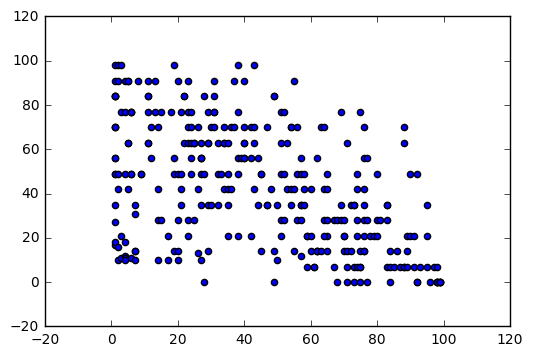

In [166]:
#does a song's top rank appear to have anything to do with it's days until peak??

plt.scatter(x=billboard['top_rank'],y=billboard['days_to_peak_int'])
plt.show()

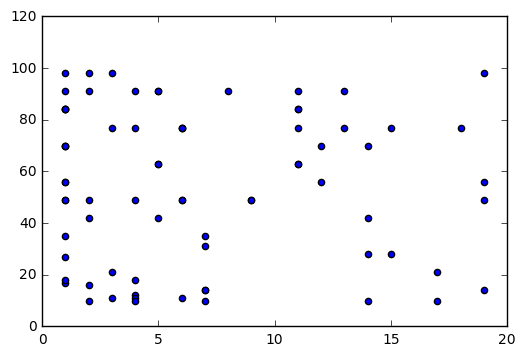

                                                 track               artist  \
0                             Independent Women Part I      Destiny's Child   
1                                         Maria, Maria              Santana   
2                                   I Knew I Loved You        Savage Garden   
3                                                Music              Madonna   
4                Come On Over Baby (All I Want Is You)  Aguilera, Christina   
5                                Doesn't Really Matter                Janet   
6                                          Say My Name      Destiny's Child   
7                                          Be With You    Iglesias, Enrique   
8                                           Incomplete                Sisqo   
9                                               Amazed             Lonestar   
10                                    It's Gonna Be Me               N'Sync   
11                                   What A Girl Wan

In [175]:
top_10_billboard = billboard[billboard["top_rank"]<20]

plt.scatter(x=top_10_billboard['top_rank'],y=top_10_billboard['days_to_peak_int'])
plt.show()
print(billboard[["track","artist","top_rank","days_to_peak_int"]])

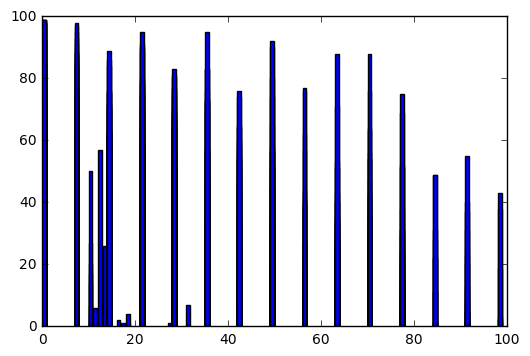

In [176]:
plt.bar(billboard['days_to_peak_int'],billboard['top_rank'])
plt.show()

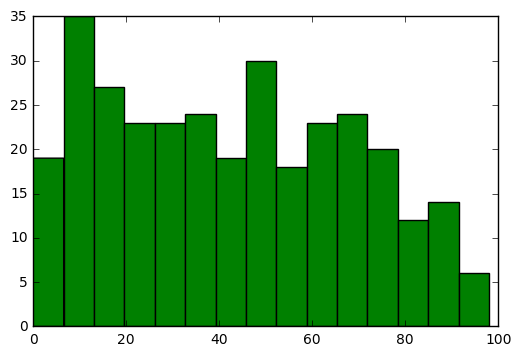

In [177]:
#plots a histogram to show distribution of how long songs take to peak
import matplotlib.pyplot as plt
plt.hist(billboard["days_to_peak_int"],bins = 15, color="green")
plt.show()

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 